<a href="https://colab.research.google.com/github/victorsponc/cientistas-de-dados-brasil/blob/main/An%C3%A1lise_perfil_cientistas_de_dados_Brasil_Victor_Sponchiado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do profissional de Ciência de dados no Brasil**

### Para realizar a análise utilizaremos a pesquisa realizada pela Data Hackers em 2019

Usaremos a biblioteca Pandas predominantemente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importar base de dados
uri = 'https://raw.githubusercontent.com/victorsponc/cientistas-de-dados-brasil/main/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(uri)

# exibir as 5 primeiras linhas
dados.head(5)

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [3]:
#tamanho da base
dados.shape

(1765, 170)

Temos 1765 respostas para a pesquisa e 170 perguntas no total.

Quantos cientistas de dados temos? Para responder, vamos analisar os cargos e moldar nossa base.



In [4]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

Vamos tratar como cientistas de dados os seguintes cargos: Data Scientist/Cientista de Dados, Engenheiro de Machine Learning e Estatístico. Os demais grupos não serão analisados. 

In [5]:
#isolando apenas cinetistas de dados
dados = dados[(dados["('D6', 'anonymized_role')"] == "Data Scientist/Cientista de Dados") |
              (dados["('D6', 'anonymized_role')"] == "Engenheiro de Machine Learning") |
              (dados["('D6', 'anonymized_role')"] == "Estatístico")]

#Renomeando coluna:
dados['profissão'] = dados["('D6', 'anonymized_role')"]

#Criando coluna com nomenclatura Cientista de dados
profmap = {      'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
                                       'Estatístico': 'Cientista de Dados',
          }
dados['cds'] = dados['profissão'].map(profmap)

dados.shape

(193, 172)

Temos no total 193 linhas para explorar.

In [6]:
import matplotlib.pyplot as plt

### Análise de idade

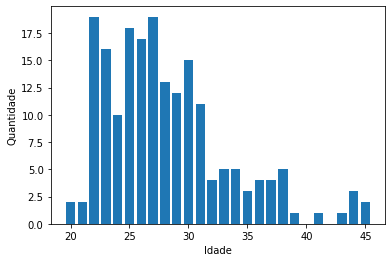

In [7]:
#Alterando título da coluna
dados['idade'] = dados["('P1', 'age')"]

#Histograma - Distribuição
qtd = dados['idade'].value_counts()
X = [int(key) for key in qtd.keys()]
Y = [qtd[key] for key in qtd.keys()]

plt.bar(X, Y)
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.show()

### Análise de Sexo

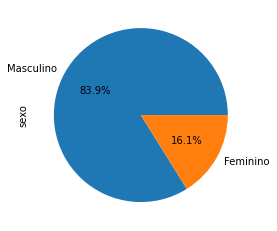

In [35]:
#Alterando título da coluna
dados['sexo'] = dados["('P2', 'gender')"]

#Qual a distribuição?
dados["sexo"].value_counts().plot(kind = 'pie', autopct="%1.1f%%");

### Análise de escolaridade e área de formação

In [9]:
#Alterando título da coluna
dados['escolaridade'] = dados["('P8', 'degreee_level')"]

#Qtd. por escolaridade
dados['escolaridade'].value_counts()

Graduação/Bacharelado         62
Mestrado                      43
Pós-graduação                 38
Estudante de Graduação        33
Doutorado ou Phd              11
Não tenho graduação formal     6
Name: escolaridade, dtype: int64

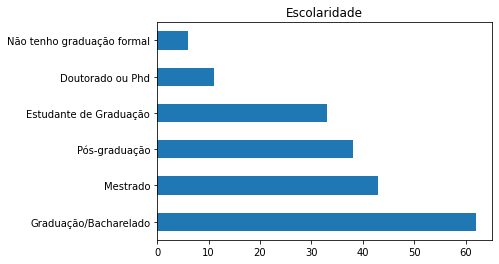

In [36]:
#Distribuição de escolaridade
dados['escolaridade'].value_counts().plot(kind = 'barh', title = 'Escolaridade');

In [38]:
#Alterando título da coluna
dados['formação'] = dados["('D3', 'anonymized_degree_area')"]

#Área de formação
dados["formação"].value_counts()

Computação / Engenharia de Software / Sistemas de Informação    92
Estatística/ Matemática / Matemática Computacional              34
Outras Engenharias                                              31
Economia/ Administração / Contabilidade / Finanças              13
Química / Física                                                 6
Outras                                                           6
Ciências Sociais                                                 3
Marketing / Publicidade / Comunicação / Jornalismo               2
Name: formação, dtype: int64

### **Analisando empresas**

Vamos fazer uma leve modificação em relação ao tamanho da empresa, separando entre pequenas, médias e grandes.

In [12]:
#Criando uma nova série e aplicando um "mapeamento".
tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}

dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)

In [13]:
#Distribuição por porte de empresa
dados['tamanho_da_empresa'].value_counts()

Média      73
Grande     63
Pequena    57
Name: tamanho_da_empresa, dtype: int64

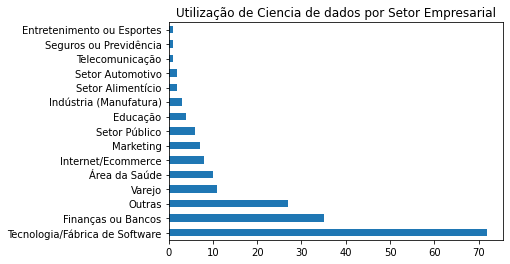

In [39]:
#Setor de atuação
dados['setor'] = dados["('D4', 'anonymized_market_sector')"]
dados['setor'].value_counts().plot(kind = 'barh', title = 'Utilização de Ciencia de dados por Setor Empresarial');

## **Agora vamos pra parte financeira do estudo**

Antes de iniciar, vou realizar outras modificações simples na base

In [15]:
#Discretizando salários
salamap = {    'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
              'Acima de R$ 25.001/mês': 25000}

dados['salario'] = dados["('P16', 'salary_range')"].map(salamap) 

#Criação de grupos de idades, escolha arbitraria dos cortes.
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']
dados['idade_grupo'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

Vamos analisar a diferença salarial nas empresas

In [16]:
#tamanho da empresa e média salarial
dados.groupby(['tamanho_da_empresa']).mean()['salario'].round(2)

tamanho_da_empresa
Grande     8079.37
Média      7260.27
Pequena    4903.51
Name: salario, dtype: float64

Sendo que a média de salário em geral é:

In [17]:
dados[['salario']].mean().round(2)

salario    6831.61
dtype: float64

Olhando os salários pelo tamanho da empresa e sexo

In [18]:
#Análise pelo sexo e tamanho da empresa
dados.groupby(['tamanho_da_empresa', 'sexo']).mean()['salario'].round(2).unstack()

sexo,Feminino,Masculino
tamanho_da_empresa,,
Grande,8785.71,8118.18
Média,5352.94,7839.29
Pequena,3785.71,5060.00


É notável a diferençade de salários entre os portes das empresas, mas também chama a atenção a discrepância dos salários entre os sexos, especialmente nas médias e pequenas empresas. Vejamos outros exemplos.

In [19]:
#Salário por escolaridade e sexo
dados.groupby(['escolaridade', 'sexo'])["salario"].mean().unstack().fillna(0).round(2)

sexo,Feminino,Masculino
escolaridade,,
Doutorado ou Phd,7500.00,14833.33
Estudante de Graduação,2166.67,3629.63
Graduação/Bacharelado,3812.50,5703.70
Mestrado,7833.33,7932.43
Não tenho graduação formal,0.00,7500.00
Pós-graduação,8166.67,9241.38


In [20]:
#Salário por idade e sexo
dados.groupby(['idade_grupo', 'sexo'])["salario"].mean().unstack().fillna(0).round(2)

sexo,Feminino,Masculino
idade_grupo,,
"[18,24]",3250.00,3921.05
"[25,30]",5461.54,6462.96
"[31,40]",9416.67,11361.11
"[41,50]",9500.00,11100.00


Os dados mostram que os salários sempre tendem a ser menores para as mulheres.

### Vejamos a média salárial em relação a idade

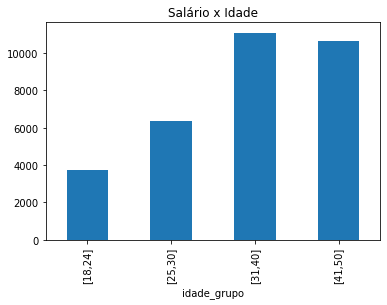

In [40]:
dados.groupby(['idade_grupo']).mean()['salario'].plot(kind = 'bar', title = 'Salário x Idade');

Temos muito mais homens do que mulheres na base, e não temos mulheres com salários superiores a R$ 20.000,00

Também é possível analisar o valor em relação ao tempo de profissão

In [22]:
#renomeando coluna
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"] 

#criação dos dados de médias salariais e ordenação
dados.groupby(['experiencia_ds','cds']).mean()['salario'].round(2).unstack().sort_values(['Cientista de Dados'], ascending = False)

cds,Cientista de Dados
experiencia_ds,
de 6 a 10 anos,12923.08
de 4 a 5 anos,10648.15
Mais de 10 anos,10409.09
de 2 a 3 anos,6704.55
de 1 a 2 anos,5333.33
Menos de 1 ano,3675.00
Não tenho experiência na área de dados,2500.00


Aprofundando um pouco em ferramentas, vamos analisar o salário em relação a linguagem de programação mais usada

In [23]:
#tabela de linguagem mais utilizada e salários médios
dados.groupby(["cds", "('P22', 'most_used_proggraming_languages')"]).mean()['salario'].round(2).unstack().T.sort_values(['Cientista de Dados'], ascending = False)

cds,Cientista de Dados
"('P22', 'most_used_proggraming_languages')",
SAS/Stata,13875.00
Java,10000.00
Python,7003.60
Scala,7000.00
SQL,6968.75
R,4978.26


R é a linguagem de programação que menos da retorno financeiro ao utilizador e SAS/Stata paga melhor salário de todos.

Se tratando dos métodos mais utilizados temos a seguinte distribuição, onde no topo da lista é a Regressão linear com 74% de utilização.

In [24]:
#criação da tabela
lista = ['Cientista de Dados']
aux1 = round(dados.filter(regex = 'P20').mean().sort_values(ascending = False), 2)
aux = pd.concat([aux1], axis = 1)
aux.columns = lista

#exibição dos dados
aux

,Cientista de Dados
"('P20', 'linear_regression')",0.74
"('P20', 'logistic_regression')",0.67
"('P20', 'decision_tree')",0.65
"('P20', 'random_forest')",0.65
"('P20', 'cluster_analysis')",0.60
"('P20', 'neural_networks')",0.46
"('P20', 'gradient_boosted_machines')",0.45
"('P20', 'ensemble')",0.40
"('P20', 'nlp')",0.35
"('P20', 'bayesian_inference')",0.32


Explorando os métodos, seus saláros médios e seu uso pelo sexo:

In [25]:
#lista de métodos para uso no For
listmetodos = list(dados.filter(regex = 'P20'))

#series de métodos para concatenação na tabela
sermetodos = pd.Series(listmetodos)

#cálculo de salário médio para os que usam o método
salmet = []
for i in listmetodos:
  salmet.append(dados.groupby([f"{i}"])['salario'].mean().round(2).iloc[1])
salmet = pd.Series(salmet)

#% de uso por sexo F pelo método
usof = []
for i in listmetodos:
  usof.append(dados.groupby(['sexo'])[f"{i}"].mean().round(2).iloc[0])
usof = pd.Series(usof)

#% de uso por sexo M pelo método
usom = []
for i in listmetodos:
  usom.append(dados.groupby(['sexo'])[f"{i}"].mean().round(2).iloc[1])
usom = pd.Series(usom)

#criação da tabela
tabela = pd.concat([sermetodos, salmet, usof, usom], axis = 1)
#Título das colunas
colunas = ['Métodos', 'Salário médio', 'Uso por mulheres', 'Uso por Homens']
tabela.columns = colunas

#ordenação dos dados e exibição
tabela.sort_values(['Salário médio'], ascending = False)

,Métodos,Salário médio,Uso por mulheres,Uso por Homens
12,"('P20', 'gans')",10111.11,0.00,0.06
11,"('P20', 'hmms')",8625.00,0.00,0.05
10,"('P20', 'rnns')",8585.71,0.13,0.19
7,"('P20', 'ensemble')",8344.16,0.16,0.45
18,"('P20', 'longitudinal_data_analysis')",7852.94,0.13,0.19
8,"('P20', 'svms')",7847.46,0.23,0.32
16,"('P20', 'cluster_analysis')",7806.03,0.52,0.62
15,"('P20', 'gradient_boosted_machines')",7738.37,0.23,0.49
9,"('P20', 'cnns')",7718.75,0.10,0.18
3,"('P20', 'decision_tree')",7571.43,0.68,0.65


Métodos onde não tivemos uso por mulheres:

In [26]:
tabela[tabela['Uso por mulheres'] == False]

,Métodos,Salário médio,Uso por mulheres,Uso por Homens
11,"('P20', 'hmms')",8625.00,0.0,0.05
12,"('P20', 'gans')",10111.11,0.0,0.06


Os métodos com melhores salários.



In [27]:
tabela.sort_values(['Salário médio'], ascending = False).head(3)

,Métodos,Salário médio,Uso por mulheres,Uso por Homens
12,"('P20', 'gans')",10111.11,0.00,0.06
11,"('P20', 'hmms')",8625.00,0.00,0.05
10,"('P20', 'rnns')",8585.71,0.13,0.19


Os métodos com menores salários.

In [28]:
tabela.sort_values(['Salário médio'], ascending = False).tail(3)

,Métodos,Salário médio,Uso por mulheres,Uso por Homens
17,"('P20', 'survival_analysis')",5134.62,0.03,0.16
19,"('P20', 'joint analysis')",4846.15,0.06,0.07
20,"('P20', 'no_listed_methods')",4428.57,0.03,0.04


Outro ponto que podemos explorar é se usar ou não o método tem reflexo no salário:

In [29]:
#cálculo de salário médio para os que NÃO usam o método
salmetnao = []
for i in listmetodos:
  salmetnao.append(dados.groupby([f"{i}"])['salario'].mean().round(2).iloc[0])
salmetnao = pd.Series(salmetnao)

#cálculo da diferença pelos usos
difsal = salmet - salmetnao

#criação da tabela
tabela_sal = pd.concat([sermetodos, salmet, salmetnao, difsal], axis = 1)

#Título das colunas
colunas_sal = ['Métodos', 'R$ USO', 'R$ NÃO USO', 'Diferença']
tabela_sal.columns = colunas_sal

#ordenação e exibição dos dados
tabela_sal.sort_values(['Diferença'], ascending = False)

,Métodos,R$ USO,R$ NÃO USO,Diferença
12,"('P20', 'gans')",10111.11,6671.20,3439.91
7,"('P20', 'ensemble')",8344.16,5827.59,2516.57
16,"('P20', 'cluster_analysis')",7806.03,5363.64,2442.39
10,"('P20', 'rnns')",8585.71,6443.04,2142.67
1,"('P20', 'logistic_regression')",7530.77,5388.89,2141.88
3,"('P20', 'decision_tree')",7571.43,5440.30,2131.13
0,"('P20', 'linear_regression')",7346.15,5360.00,1986.15
11,"('P20', 'hmms')",8625.00,6754.05,1870.95
15,"('P20', 'gradient_boosted_machines')",7738.37,6102.80,1635.57
8,"('P20', 'svms')",7847.46,6384.33,1463.13


Veja que temos métodos com reflexos estranhos no salário, onde se você o utiliza, em média ganhará menos.

In [30]:
tabela_sal[tabela_sal['Diferença'] < 0]

,Métodos,R$ USO,R$ NÃO USO,Diferença
13,"('P20', 'markov_chains')",6557.69,6874.25,-316.56
17,"('P20', 'survival_analysis')",5134.62,7095.81,-1961.19
19,"('P20', 'joint analysis')",4846.15,6975.00,-2128.85
20,"('P20', 'no_listed_methods')",4428.57,6922.04,-2493.47


Saindo dos métodos, vamos verificar o salário em relação ao tipo de emprego:

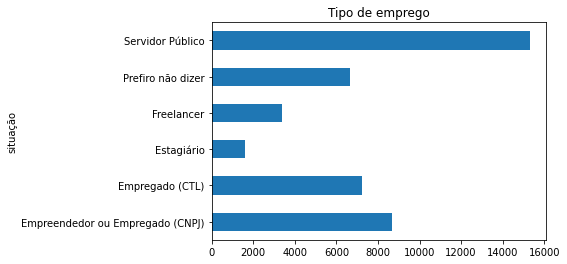

In [41]:
#Nova coluna situação
dados['situação'] = dados["('P10', 'job_situation')"]

#exibição
dados.groupby(['situação']).mean()['salario'].plot(kind = 'barh', title = 'Tipo de emprego');

In [32]:
#Visualização em tabela
dados.groupby(['situação', 'cds']).mean()['salario'].round(2).T.unstack().sort_values(['Cientista de Dados'], ascending= False)

cds,Cientista de Dados
situação,
Servidor Público,15333.33
Empreendedor ou Empregado (CNPJ),8666.67
Empregado (CTL),7255.32
Prefiro não dizer,6666.67
Freelancer,3375.00
Estagiário,1619.05


Notável a diferença de salários do grupo Servidor Público para os demais

Por fim, vejamos a diferença salarial média por formação.

In [33]:
#criação da tabela e ordenação
dados.groupby(['escolaridade', 'cds']).mean()['salario'].round(2).T.unstack().sort_values(['Cientista de Dados'], ascending = False)

cds,Cientista de Dados
escolaridade,
Doutorado ou Phd,13500.00
Pós-graduação,8986.84
Mestrado,7918.60
Não tenho graduação formal,6416.67
Graduação/Bacharelado,5459.68
Estudante de Graduação,3363.64


In [34]:
dados['salario'].describe()

count      193.000000
mean      6831.606218
std       4725.692852
min       1000.000000
25%       3500.000000
50%       5000.000000
75%      10000.000000
max      25000.000000
Name: salario, dtype: float64

#Conclusão

### A ciência de dados está cada dia mais em alta no Brasil, mesmo num momento de dificuldades econômicas. Com nossa análise exploratória de dados, fomos capazes de identificar alguns atributos do perfil do cientista de dados, como por exemplo sua idade média jovem, em torno de 28 anos, outra informação que salta aos olhos é a diferença salarial entre os sexos, mesmo que não tenhamos uma base tão grande, ainda é notável que tal diferença exista de fato. Analisamos a distribuição entre os sexos, que predominantemente ainda é masculina, sua área de formação além de sua escolaridade, que podemos dizer que é bem diversa. Quando olhamos diretamente para as empresas, percebemos que não tem tamanho que predomina no uso de dados para o negócio, e em relação ao setor de atuação da empresa, temos mais empresas de tecnologia e finanças, porém acho que está enviesado pois a pesquisa foi feita num site mais utilizado por profissionais de tecnologia. Análises de salários foram feitas em diversas comparações como tamanho de empresa, linguagem de programação que utiliza, pelo nível de escolaridade, idade, experiência na área, ferramentas, métodos que utiliza e tipo de emprego. Por fim creio que ao checar esse estudo é possível entender um pouco desse mercado, juntamente com o que você deve aprender e ter como expectativa de salário.
###Agradeço por ter lido até aqui, e caso tenha alguma dúvida, estou à disposição.
